### Homework 2- CLuster Algorithm 

#### Overview: 

###### In Homework 1, we have investigated supervised learning with multilinear regression wherein the given dataset we have a target variable to estimate the future prediction. Here, we use unsupervised learning where we have a set of features but a target variable or a class label. Using these datasets, we try to identify the underlying structure in the data by using K means clustering to make useful predictions out of it.  


 #### Importing Essential Libraries
 
 ##### First, we import the necessary working libraries such as Pandas and numpymodules which contains tools for
 data manipulation and for working with arrays threby  expedite the data analysis process 

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
%matplotlib inline 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn .model_selection import train_test_split 

   #### IMORTING The Dataset

In [87]:
df = pd.read_csv('Employee_Expenditure.csv')
df.head()

,Employee ID,first_name,Sex,Age,AnlSalaryInK,Spending_ Score (1-100)
0,1,Craig,Male,19,15,39
1,2,Lisa,Male,21,15,81
2,3,Abram,Female,20,16,6
3,4,Alberson,Female,23,16,77
4,5,"Adams,",Female,31,17,40


In [88]:
# Viewing the labels.
df.columns 

Index(['Employee ID', 'first_name', 'Sex', 'Age', 'AnlSalaryInK',
       'Spending_ Score (1-100)'],
      dtype='object')

In [89]:
# The 'shape' which is an attribute of pandas. it displays DataFrame the number of rows and columns as a tuple

df.shape

(300, 6)

In [90]:
# The info() function is used to print a concise summary of a DataFrame. 
# including the index dtype and column dtypes, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
Employee ID                300 non-null int64
first_name                 300 non-null object
Sex                        300 non-null object
Age                        300 non-null int64
AnlSalaryInK               300 non-null int64
Spending_ Score (1-100)    300 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.1+ KB


   #### conversion of  'sex' catergorical values to numerics

In [91]:
# Substituting the catergorica value to nymerical :

def tra_sex(x):
     if x=='Male':
        return 1
     if x=='Female':
        return 2

In [92]:
#  The new dataset of the column for both sex is shown hereunder ('trans-Sex')

df['tra_sex']=df['Sex'].apply(tra_sex)
df.head()

,Employee ID,first_name,Sex,Age,AnlSalaryInK,Spending_ Score (1-100),tra_sex
0,1,Craig,Male,19,15,39,1
1,2,Lisa,Male,21,15,81,1
2,3,Abram,Female,20,16,6,2
3,4,Alberson,Female,23,16,77,2
4,5,"Adams,",Female,31,17,40,2


In [93]:
# method is used for calculating some statistical data including percentile 
# mean and std of the numerical values of the target DataFrame

df.describe()

,Employee ID,Age,AnlSalaryInK,Spending_ Score (1-100),tra_sex
count,300.000000,300.000000,300.000000,300.000000,300.00000
mean,150.500000,38.856667,63.963333,49.930000,1.54000
std,86.746758,13.808150,22.736722,25.771022,0.49923
min,1.000000,18.000000,15.000000,1.000000,1.00000
25%,75.750000,28.750000,54.000000,35.000000,1.00000
50%,150.500000,36.000000,65.000000,49.500000,2.00000
75%,225.250000,49.000000,78.000000,72.250000,2.00000
max,300.000000,70.000000,137.000000,99.000000,2.00000


In [95]:
# to display the first 5 rows of the dataframe

df.head()

,Employee ID,first_name,Sex,Age,AnlSalaryInK,Spending_ Score (1-100),tra_sex
0,1,Craig,Male,19,15,39,1
1,2,Lisa,Male,21,15,81,1
2,3,Abram,Female,20,16,6,2
3,4,Alberson,Female,23,16,77,2
4,5,"Adams,",Female,31,17,40,2


### Data  Explore 

Is used for understanding the data and its patterns. It helps create a more straightforward view of datasets 

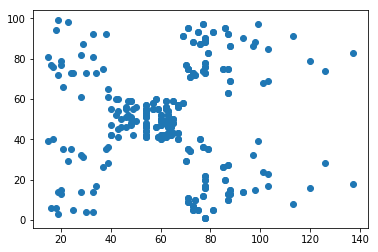

In [96]:
# The  scatter plot create a scatter plot with varying marker point size and color.
# The coordinates of each point are defined by two dataframe columns and filled circles are used to represent each point.
# the scatter plot here depicts the ditribution of  Anaual Salary and Spending score from the dataset.

plt.scatter(df['AnlSalaryInK'],df['Spending_ Score (1-100)'] )

In [97]:
# As can be seen on the scatter plot, The large dataset concentration make it  difficult to determin the size of 'k'
# since it is manadatory to determin the size of 'k', 

 ### K-Means Methd 

K Means algorithm is unsupervised machine learning technique used to cluster data points. In this project using sklearn, kmeans and python. Elbow method  used to determine optimal number of k, review the  method as well

In [98]:
# To apply the K Means Clusters, first import necessary tools from sklearn library:
 
    from sklearn.cluster import KMeans

IndentationError: unexpected indent (<ipython-input-98-f0de3c7c1909>, line 3)

In [99]:
# Create a K means objects . The k-means clustering method is an unsupervised machine learning technique used to 
# identify clusters of data objects in a dataset.

km = KMeans (n_clusters = 5)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [100]:
# To fit K measn  object to dataset and predict only AnlSalaryInK','Spending_ Score (1-100) from the dataframe 

y_predicted=km.fit_predict(df[['AnlSalaryInK','Spending_ Score (1-100)']])
y_predicted    

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3])

In [102]:
# And it has computed the given K to create  five clusters as shown above and asign in to five clusters as shown above.

df['cluster']=y_predicted
df.head()

,Employee ID,first_name,Sex,Age,AnlSalaryInK,Spending_ Score (1-100),tra_sex,cluster
0,1,Craig,Male,19,15,39,1,4
1,2,Lisa,Male,21,15,81,1,0
2,3,Abram,Female,20,16,6,2,4
3,4,Alberson,Female,23,16,77,2,0
4,5,"Adams,",Female,31,17,40,2,4


In [103]:
# Visualizing to see  what kind of clusters it produced :

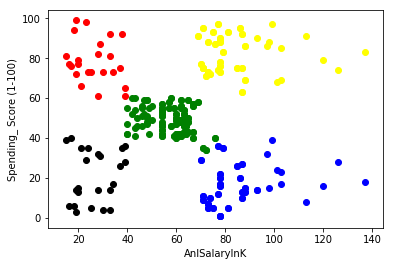

In [104]:
# Separting the five clusters in five dataframes: 

df1= df[df.cluster==0]     # It returns all the rows from df where cluster is zero
df2= df[df.cluster==1]     # It returns all the rows from df where cluster is one
df3= df[df.cluster==2]     # It returns all the rows from df where cluster is two
df4= df[df.cluster==3]     # It returns all the rows from df where cluster is three 
df5= df[df.cluster==4]     # It returns all the rows from df where cluster is four

plt.scatter(df1.AnlSalaryInK,df1['Spending_ Score (1-100)'],color='red') 
plt.scatter(df2.AnlSalaryInK,df2['Spending_ Score (1-100)'],color='green')
plt.scatter(df3.AnlSalaryInK,df3['Spending_ Score (1-100)'],color='yellow')
plt.scatter(df4.AnlSalaryInK,df4['Spending_ Score (1-100)'],color='blue')
plt.scatter(df5.AnlSalaryInK,df5['Spending_ Score (1-100)'],color='black')

plt.xlabel('AnlSalaryInK')
plt.ylabel('Spending_ Score (1-100)')
plt.show()

In [105]:
# from the above scatter plot , due to small scaling , the datapoint  and legend keys seem to conjested .
# It requires rescaling to have a better view by uisng Minmax Scaler.

In [106]:
# Below shows the centroid of the five clusters.
km.cluster_centers_

array([[26.30434783, 78.56521739],
       [57.81102362, 48.95275591],
       [82.98507463, 82.02985075],
       [84.61666667, 16.3       ],
       [26.30434783, 20.91304348]])

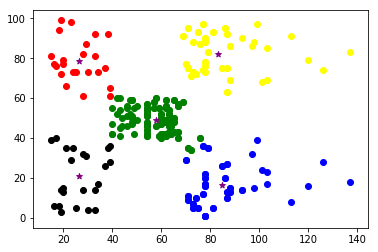

In [107]:
plt.scatter(df1.AnlSalaryInK,df1['Spending_ Score (1-100)'],color='red') 
plt.scatter(df2.AnlSalaryInK,df2['Spending_ Score (1-100)'],color='green')
plt.scatter(df3.AnlSalaryInK,df3['Spending_ Score (1-100)'],color='yellow')
plt.scatter(df4.AnlSalaryInK,df4['Spending_ Score (1-100)'],color='blue')
plt.scatter(df5.AnlSalaryInK,df5['Spending_ Score (1-100)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.show()

In [108]:
# where the pruple star (*) is centroid to identify five clusters. 

### Elbow Plot Method  
##### We can use the elbow method to find the size of "k"  We try to calculate the SSE by providieng random numbers 1-10  in place of K and plt to find the elbow  to enable us find  the right 'k" size. 

In [109]:
# Lets's define  my K-Range by provideing 1 to 10 
 # so that each iteration creates cluster 
# let's create an arry with the sum of square and store here.

k_range =range(1,10)
sse = []   
for k in k_range:    
    km= KMeans (n_clusters = k)
    km.fit(df[['AnlSalaryInK', 'Spending_ Score (1-100)']])
    sse.append(km.inertia_)    

In [110]:
# SSE was high initially ,however it kept reducing afterwards.
sse 

[353150.1266666667,
 225223.94204545455,
 128243.93780282042,
 92577.00440440832,
 58028.10720013421,
 49639.14147612269,
 42247.992444270705,
 34536.44145205339,
 30300.399906119816]

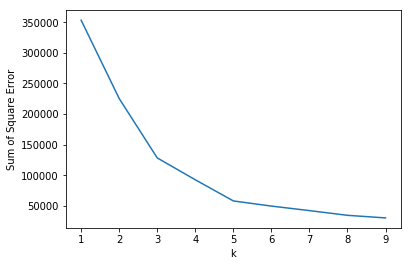

In [111]:
# Below show the Elbow  Plot of the SSE by K to depict  K =5 
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.plot(k_range,sse)

In [112]:
# from the plot we can see that K= 5. 

In [ ]:
# The new dataset is shown in the table hereunder.

#### K nearess Neighbour (K-NN) Method

In [113]:
df.head()

,Employee ID,first_name,Sex,Age,AnlSalaryInK,Spending_ Score (1-100),tra_sex,cluster
0,1,Craig,Male,19,15,39,1,4
1,2,Lisa,Male,21,15,81,1,0
2,3,Abram,Female,20,16,6,2,4
3,4,Alberson,Female,23,16,77,2,0
4,5,"Adams,",Female,31,17,40,2,4


In [114]:
X= df[['tra_sex']]
y= df['Spending_ Score (1-100)']

In [115]:
Xtrain, Xtest , ytrain ,ytest = train_test_split(X,y,test_size=0.30)

In [116]:
y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending_ Score (1-100), dtype: int64

In [117]:
X.head()

,tra_sex
0,1
1,1
2,2
3,2
4,2


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain=scaler.transform(Xtrain)
Xtest=scaler.transform(Xtest)

C:\Users\MYHIW\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MYHIW\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\MYHIW\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [119]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors= 5)
classifier.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [145]:
 km.fit(df[['AnlSalaryInK', 'Spending_ Score (1-100)']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Conclusion
In this project, K Means was used, to studying to classify and form clusters. To this effect, the Elbow method was used to find out the size of “K” equal to 5 to place similar clusters together and data points in the different clusters are farther apart. 